<a href="https://colab.research.google.com/github/SantiagoVillalobosB/Machine_Learning_2022/blob/Proyectos-primer-corte/Proyecto_econometria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importaron los paquetes que eran requeridos para poder correr todo el programa


In [ ]:
!pip install wooldridge
import wooldridge as wd
import pandas as pd
import numpy as np
import statistics as st
import scipy.stats as sst
from scipy import stats

     |████████████████████████████████| 5.1 MB 4.2 MB/s 


Sen crea la clase y los atributos para cada una de las funciones para poder iniciar a crear cada una de las funciones, se inicia creando las matrices X e Y para poder realizar las operaciones matriciales para calcular lo requerido para el programa.


Después se empiezan a crear las sumatorias, como la sumatoria explicada de los cuadrados, suma total de los cuadrados y y la sumatoria de residuos al cuadrado, debido a que estas se necesitan para calcular el error estandar

Por ultimo se calculan los estadisticos 

In [ ]:
class econometria:
    def __init__(self,Y,X):
        self.Y=Y.to_numpy().reshape(len(Y),1)
        self.X=np.concatenate((np.ones([len(self.Y),1]),X.to_numpy()),axis = 1)
        self.n=self.X.shape[0] 
        self.k=self.X.shape[1]-1
        self.grados=self.n-self.k-1
        self.betas=(np.linalg.inv((np.transpose(self.X)@self.X))@np.transpose(self.X)@self.Y)
        
        self.res=self.Y-(self.X@self.betas)
        self.sec=np.sum((self.X@self.betas-np.mean(self.Y))**2)
        self.src=np.sum((self.res)**2)
        self.stc=np.sum((self.Y-np.mean(self.Y))**2)
        self.r2=1-self.src/self.stc

        self.mcova=(self.src/self.grados)*(np.linalg.inv(np.transpose(self.X)@self.X))
        self.varianza=np.diag(self.mcova)
        self.ee=((self.varianza)**(1/2))
        

        self.t_stat=[betas/errores for (betas,errores) in zip (self.betas.ravel().tolist(), self.ee)]
        self.pvalores=[stats.t.sf(np.abs(t_val),self.n-1)*2 for t_val in self.t_stat]
 

        self.valor_t=sst.t.ppf(1-0.05/2, df=self.n -self.k-1)
        self.conf_int= [sorted([beta- (error*self.valor_t), beta + (error * self.valor_t)]) for (beta, error) in zip (self.betas.ravel().tolist(), self.ee)]
       

Se importan la base de datos de wooldridge __Crime1__ y se dan las variables que van a ser las variables independientes _pcnv, avgsen, tottime, inc86_ y la variable dependiente _narr86_ 

In [ ]:
datos=wd.data('crime1')
data_1=econometria(datos['narr86'],datos[['pcnv','avgsen','tottime','inc86']])

Se crea el DataFrame para poder visualizar los resultados de la primera regresión y poder visualizar los estimadores, el error estandar, el estadistico t y los intervalos de confianza.



In [ ]:
df=pd.DataFrame({'variables':['Constante','Variable independiente 1 pcnv','Variable independiente 2 avgsen','Variable independiente 3 tottime','Variable independiente 4 inc86'],
                 'betas': data_1.betas.ravel().tolist(),
                'error_estandar': data_1.ee.ravel().tolist(),
                't-student':data_1.t_stat,
                'Intervalos de confianza': data_1.conf_int})
df=df.set_index('variables')

In [ ]:
df

,betas,error_estandar,t-student,Intervalos de confianza
variables,,,,
Constante,0.593875,0.025858,22.967037,"[0.5431721558545495, 0.6445776221580033]"
Variable independiente 1 pcnv,-0.162437,0.040816,-3.979729,"[-0.24247063528250884, -0.08240328033370249]"
Variable independiente 2 avgsen,-0.006188,0.012381,-0.499811,"[-0.030464620847946045, 0.01808856523255329]"
Variable independiente 3 tottime,0.007711,0.009432,0.817496,"[-0.01078398728484388, 0.02620523202720996]"
Variable independiente 4 inc86,-0.002436,0.000243,-10.016853,"[-0.0029130364901044322, -0.0019592651470449695]"


Aca se pueden obserar los resultados de la regresion y se pueden comparar con el programa STATA para verificar y corroborar la vericidad de estos datos.

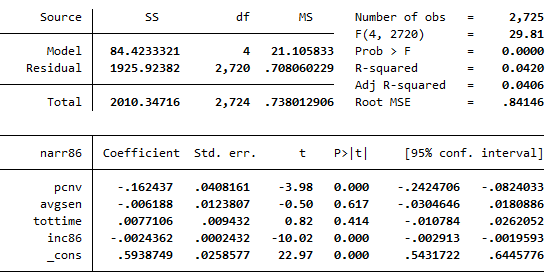
 



El analisis de esta regresion ya obtenidos y corroborados es importante conocer a que hace referencia cada variable para poder dar un analisis correcto: 


1. **narr86:** número de veces arrestado en el año 1986
2. **pcnv:** proporción de condenas anteriores
3. **avgsen:** longitud promedio de la condena en meses
4. **tottime:** tiempo en prisión desde 18 meses
5. **inc86:** ingresos legales en 1986 en una cantidad de $100






La interpretación se hara por cada variable: 
1. un aumento en la proporción de las condenas se espera que el numero de veces que la persona fue arrestado en el 86 disminuya en -0.16

2. Un aumento en la longitud promedio que estuvo condenado la persona hara que se disminuya en -0.006 el numero de veces que la persona es arrestada en 1986

3. Un aumento en el tiempo que se estuvo en prision hara un cambio de 0.007 en el numero de veces que fue arrestado en el 86 

4. Un incremento en los ingresos del año 1986 disminuye el numero de veces en ser arrestado en -0.0024

In [ ]:
data_2=econometria(datos['narr86'],datos[['pcnv','avgsen','tottime','inc86','pcnvsq','inc86sq']])

In [ ]:
df2=pd.DataFrame({'variables':['Constante','Variable independiente 1 pcnv','Variable independiente 2 avgsen','Variable independiente 3 tottime','Variable independiente 4 inc86','Variable independiente 5 pcnvsq','Variable independiente 6 inc86sq'],
                 'betas': data_2.betas.ravel().tolist(),
                'error_estandar': data_2.ee.ravel().tolist(),
                't-student':data_2.t_stat,
                'Intervalos de confianza': data_2.conf_int})
df2=df2.set_index('variables')

In [ ]:
df2

,betas,error_estandar,t-student,Intervalos de confianza
variables,,,,
Constante,0.577524,0.029933,19.293661,"[0.518829285423186, 0.6362180898215832]"
Variable independiente 1 pcnv,0.622634,0.154837,4.021223,"[0.3190241207696006, 0.926244798578885]"
Variable independiente 2 avgsen,-0.006925,0.012280,-0.563954,"[-0.031004934183137354, 0.01715399647935378]"
Variable independiente 3 tottime,0.004489,0.009366,0.479257,"[-0.01387655450227672, 0.022854038458164166]"
Variable independiente 4 inc86,-0.004081,0.000530,-7.704219,"[-0.005119470679867374, -0.0030422042828319286]"
Variable independiente 5 pcnvsq,-0.826588,0.156661,-5.276295,"[-1.1337745088908782, -0.5194020725070914]"
Variable independiente 6 inc86sq,0.000009,0.000002,4.017021,"[4.384736640909722e-06, 1.2747562717823525e-05]"


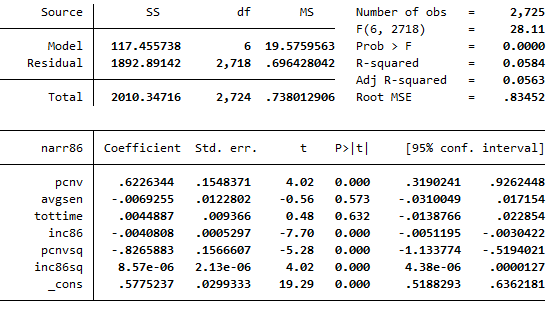

El analisis de esta regresion con las nuevas variables añadidas se hará de la misma manera que la primera, pero antes se revisara a que hace referencia las nuevas variables: 


1. **pcnvsq** proporción de condenas anteriores al cuadrado 
2. **inc86sq** ingresos legales en 1986 en una cantidad de $100 al cuadrado